In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os


from IPython.display import Image
from convex_nmf import convex_nmf
from standard_nmf import StandardNMF
from utils import compute_sparsity

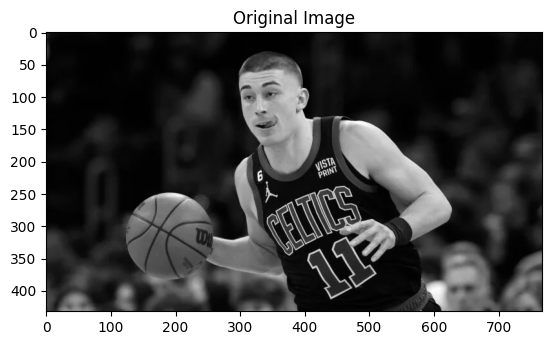

In [2]:
path = f'{os.getcwd()}/data_files/prichard.png'
img = cv2.imread(path)
grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Noramlize image so NMF can be computed more easily
normalized_grayscale_img = grayscale_img / 255

plt.imshow(normalized_grayscale_img, cmap = 'gray')
plt.title('Original Image')
plt.show()

In [3]:
ranks = [5, 10, 15, 100]

### Rank 5 ###


  3%|▎         | 148/5000 [00:01<00:54, 88.73it/s]


Convergence achieved at iteration 148...
Proportion of non-zero elements for G_T and W: 0.6997395833333333, 0.6822916666666666
### Rank 10 ###


  7%|▋         | 326/5000 [00:03<00:54, 86.13it/s]


Convergence achieved at iteration 326...
Proportion of non-zero elements for G_T and W: 0.5200520833333333, 0.279296875
### Rank 15 ###


  5%|▌         | 251/5000 [00:02<00:54, 87.19it/s]


Convergence achieved at iteration 251...
Proportion of non-zero elements for G_T and W: 0.5510416666666667, 0.4556423611111111
### Rank 100 ###


 14%|█▎        | 683/5000 [00:12<01:16, 56.29it/s]


Convergence achieved at iteration 683...
Proportion of non-zero elements for G_T and W: 0.292890625, 0.18299479166666666


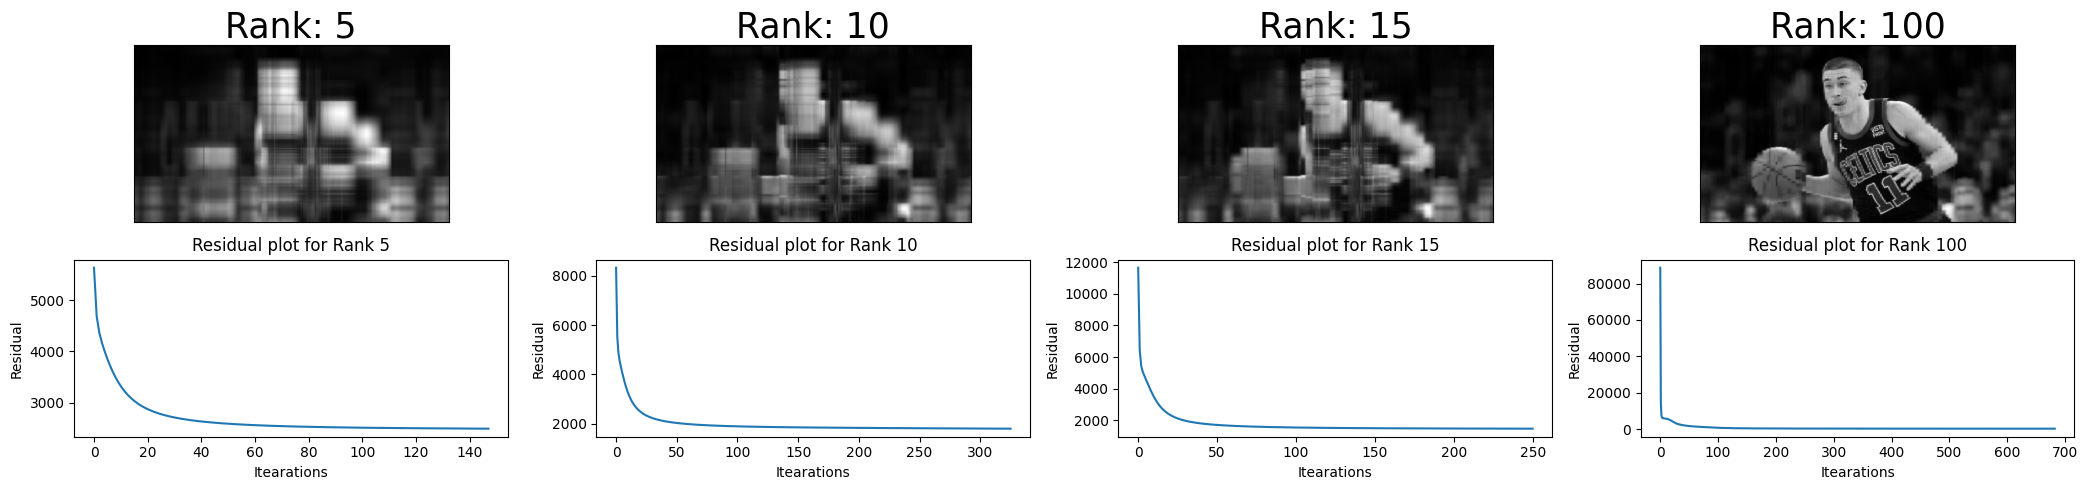

In [13]:
# Convex NMF
n_plots = len(ranks)
fig, ax = plt.subplots(2, n_plots, figsize=[21, 5])

n = 0
for rank in ranks:
    print(f'### Rank {rank} ###')
    F, W, G_T, residual_vector = convex_nmf(normalized_grayscale_img, rank, tol = 1e-4, max_iter=5000, random_state=100)
    G_T_sparse, num_non_zero_G = compute_sparsity(G_T)
    W_sparse, num_non_zero_W = compute_sparsity(W)
    print(f'Proportion of non-zero elements for G_T and W: {num_non_zero_G}, {num_non_zero_W}')
    ax[0][n].imshow(F @ G_T, cmap='gray')
    ax[0][n].set_xticks([])
    ax[0][n].set_yticks([])
    ax[0][n].set_title('Rank: {}'.format(rank), fontsize=25)

    ax[1][n].plot(residual_vector)
    ax[1][n].set_xlabel('Itearations')
    ax[1][n].set_ylabel('Residual')
    ax[1][n].set_title(f'Residual plot for Rank {rank}')

    n += 1

plt.tight_layout()

## Rank: 5 ##


  1%|▏         | 73/5000 [00:00<00:07, 640.27it/s]


Convergence achieved at iteration 73...
## Rank: 10 ##


  3%|▎         | 150/5000 [00:00<00:09, 537.40it/s]


Convergence achieved at iteration 150...
## Rank: 15 ##


  5%|▌         | 251/5000 [00:00<00:06, 754.84it/s]


Convergence achieved at iteration 251...
## Rank: 100 ##


 28%|██▊       | 1419/5000 [00:03<00:08, 413.15it/s]


Convergence achieved at iteration 1419...


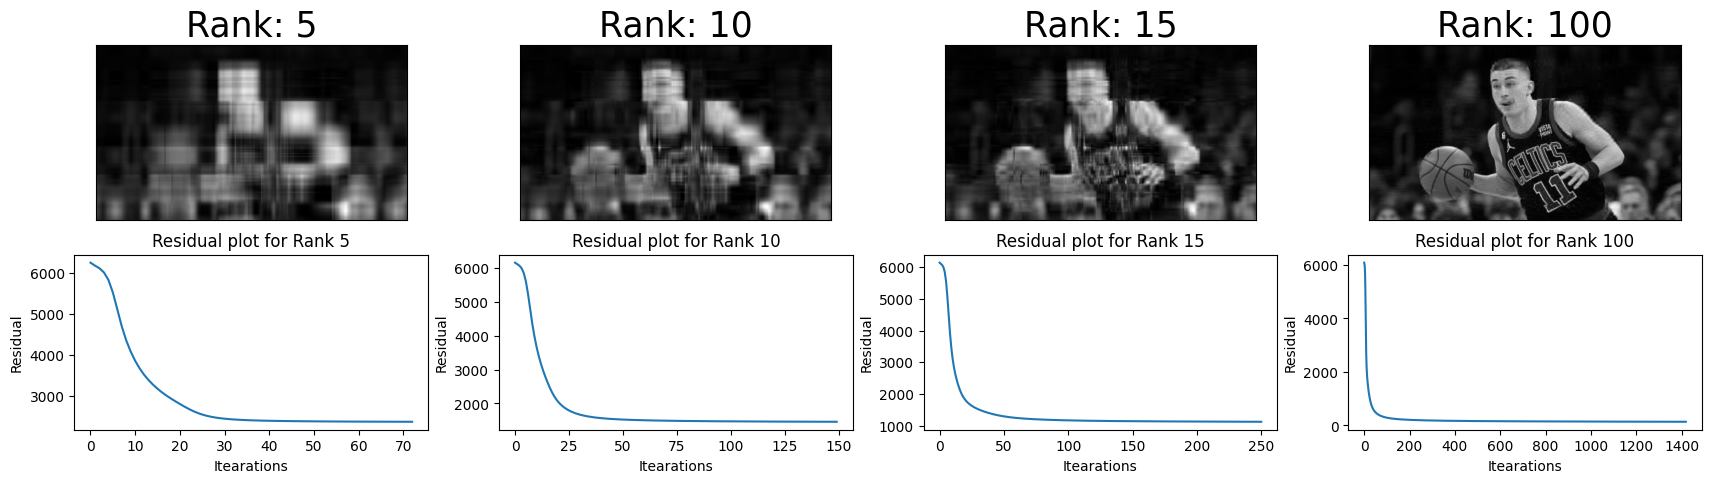

In [12]:
# Standard NMF
n_plots = len(ranks)
fig, ax = plt.subplots(2, n_plots, figsize=[21, 5])
n = 0
for rank in ranks:
    print(f'## Rank: {rank} ##')
    model = StandardNMF(normalized_grayscale_img, num_bases=rank, n_iter=5000, tol = 1e-4, random_state = 100)
    W, H, residual_vector = model.factorize()
    ax[0][n].imshow(W @ H, cmap='gray')
    ax[0][n].set_xticks([])
    ax[0][n].set_yticks([])
    ax[0][n].set_title('Rank: {}'.format(rank), fontsize=25)

    ax[1][n].plot(residual_vector)
    ax[1][n].set_xlabel('Itearations')
    ax[1][n].set_ylabel('Residual')
    ax[1][n].set_title(f'Residual plot for Rank {rank}')

    n += 1